# Ethnicity classification task using a Convolutional Neural Network (CNN).

In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras import layers, models


## 🧹 Step 3: Data Preprocessing
We’ll:

Parse filenames to extract ethnicity labels
Load and resize images (e.g., 128×128 or 224×224)
Normalize pixel values to [0, 1]
Split into train/validation sets

In [6]:
DATA_DIR = './UTKFace/'
IMG_SIZE = 128
NUM_CLASSES = 5

In [7]:
def load_data(data_dir, img_size):
    images = []
    labels = []
    for filename in os.listdir(data_dir):
        if filename.endswith('.jpg'):
            parts = filename.split('_')
            if len(parts) < 4:
                continue
            try:
                ethnicity = int(parts[2])
                if ethnicity in range(NUM_CLASSES):
                    img_path = os.path.join(data_dir, filename)
                    img = cv2.imread(img_path)
                    img = cv2.resize(img, (img_size, img_size))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    images.append(img)
                    labels.append(ethnicity)
            except:
                continue
    return np.array(images), np.array(labels)

In [8]:
X, y = load_data(DATA_DIR, IMG_SIZE)
X = X.astype('float32') / 255.0  # Normalize
y = tf.keras.utils.to_categorical(y, NUM_CLASSES)  # One-hot encode

In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## 🧠 Step 4: Build CNN Model (TensorFlow/Keras)

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')  # 5 ethnicities
])

c:\Users\kibes\OneDrive\Documents\PROJECTS\Ethnicity-Detection-System\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455,493 (1.74 MB)

 Trainable params: 455,493 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

## 🏋️ Step 5: Train the Model

In [13]:
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=3)
]

In [14]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)

Epoch 1/30
557/557 ━━━━━━━━━━━━━━━━━━━━ 270s 476ms/step - accuracy: 0.4488 - loss: 1.4063 - val_accuracy: 0.4708 - val_loss: 1.3329 - learning_rate: 0.0010
Epoch 2/30
557/557 ━━━━━━━━━━━━━━━━━━━━ 261s 468ms/step - accuracy: 0.4674 - loss: 1.3439 - val_accuracy: 0.4827 - val_loss: 1.3116 - learning_rate: 0.0010
Epoch 3/30
557/557 ━━━━━━━━━━━━━━━━━━━━ 239s 430ms/step - accuracy: 0.5082 - loss: 1.2570 - val_accuracy: 0.5343 - val_loss: 1.1838 - learning_rate: 0.0010
Epoch 4/30
557/557 ━━━━━━━━━━━━━━━━━━━━ 263s 472ms/step - accuracy: 0.5828 - loss: 1.1018 - val_accuracy: 0.6149 - val_loss: 1.0224 - learning_rate: 0.0010
Epoch 5/30
557/557 ━━━━━━━━━━━━━━━━━━━━ 265s 476ms/step - accuracy: 0.6394 - loss: 0.9821 - val_accuracy: 0.6059 - val_loss: 1.0337 - learning_rate: 0.0010
Epoch 6/30
557/557 ━━━━━━━━━━━━━━━━━━━━ 282s 507ms/step - accuracy: 0.6701 - loss: 0.9081 - val_accuracy: 0.6961 - val_loss: 0.8437 - learning_rate: 0.0010
Epoch 7/30
557/557 ━━━━━━━━━━━━━━━━━━━━ 280s 502ms/step - accura

## 📊 Step 6: Evaluate and Visualize Results

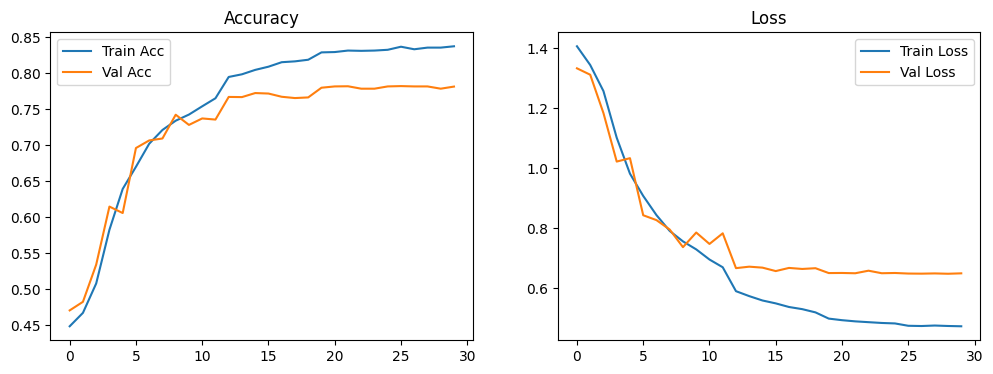

In [15]:
# Plot accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

## 🚀 Step 7: Make Predictions

In [17]:
def predict_ethnicity(img_path, model, img_size=128):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    
    pred = model.predict(img)
    ethnicity_idx = np.argmax(pred)
    confidence = np.max(pred)
    
    ethnicities = ['White', 'Black', 'Asian', 'Indian', 'Others']
    return ethnicities[ethnicity_idx], confidence

In [18]:
# Example
pred_class, conf = predict_ethnicity('./UTKFace/1_0_0_20161219154956869.jpg.chip.jpg', model)
print(f"Predicted: {pred_class} ({conf:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Predicted: Asian (0.78)


In [20]:
model.save('ethnicity_cnn_model.h5')